### K Means clustering

K-means is an iterative, unsupervised clustering algorithm that groups similar instances together into clusters.

The k-means clustering algorithm attempts to split a given anonymous data set (a set containing no information as to class identity) into a fixed number (k) of clusters. 
Initially k number of so called centroids are chosen. 

The algorithm starts by guessing the initial centroids for each cluster, and then repeatedly assigns instances to the nearest cluster and re-computes the centroid of that cluster. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline
import scipy.io

In [2]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [3]:
data = scipy.io.loadmat('...../data.mat')  
data

{'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.24399257],
        [ 1.01732013,  4.84473647],
        [ 2.17893568,  5.29758701],
        [ 2.85962615,  5.26041997],
        [ 1.30882588,  

Test the function 

In [4]:
X = data['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([ 0.,  2.,  1.])

Create function to compute the centroid of a cluster. 

A centroid is a data point (imaginary or real) at the center of a cluster.



In [5]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [6]:
compute_centroids(X, idx, 3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [7]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [8]:
idx, centroids = run_k_means(X, initial_centroids, 10)

plot the data 

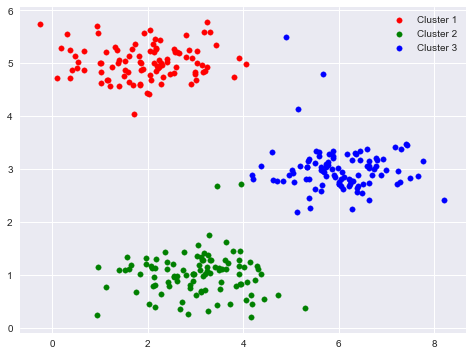

In [9]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [10]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [11]:
init_centroids(X, 3)

array([[ 5.57812294,  3.24766016],
       [ 1.59141937,  4.83212573],
       [ 3.93616029,  1.46202934]])